In [78]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv(r"C:\Users\Ashwin\Downloads\DailyDelhiClimate.csv")

In [80]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [81]:
df.shape

(1576, 5)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.7+ KB


In [83]:
df.describe(include=object)

,date
count,1576
unique,1575
top,2017-01-01
freq,2


In [84]:
df.describe(include=float)

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1010.593178
std,7.345014,16.979994,4.510725,175.242704
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.750000,3.700000,1001.875000
50%,27.166667,62.440476,6.363571,1009.055556
75%,31.142857,72.125000,9.262500,1015.200000
max,38.714286,100.000000,42.220000,7679.333333


In [85]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [86]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

Mean Temperature in Delhi Over the Years

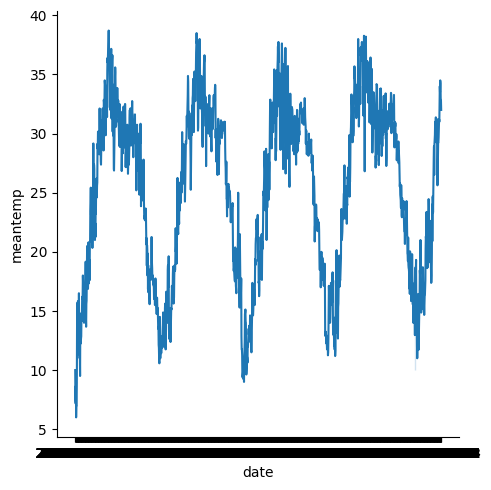

In [87]:
sns.relplot(x=df['date'], y=df['meantemp'], kind="line")

Humidity in Delhi Over the Years

<Figure size 1500x1400 with 0 Axes>

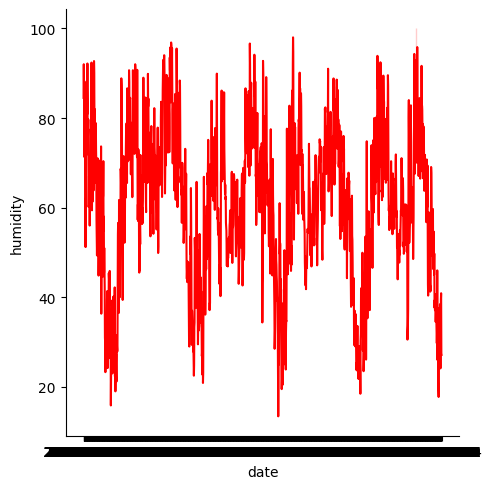

In [88]:
plt.figure(figsize=(15,14))

sns.relplot(x=df['date'], y=df['humidity'], kind="line", color="red")

The wind speed in Delhi over the years

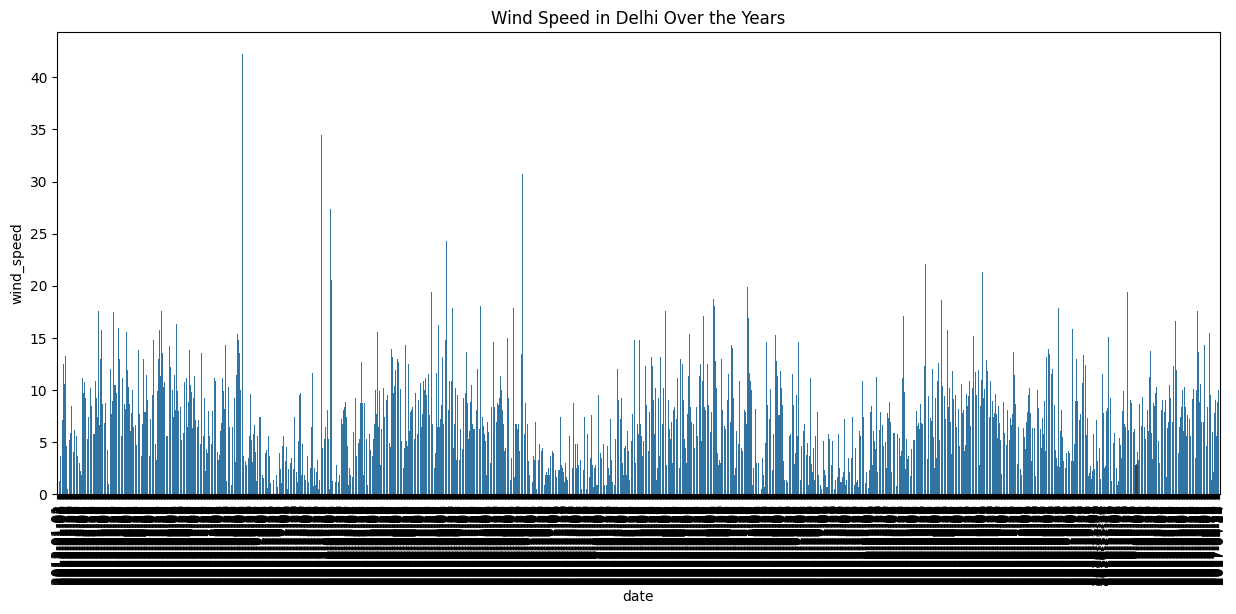

In [89]:
plt.figure(figsize=(15, 6))
sns.barplot(x='date', y='wind_speed', data=df)
plt.title("Wind Speed in Delhi Over the Years")
plt.xticks(rotation=90)
plt.show()

1. Temperature Trends — Seasonal Peaks, Monthly Averages, Heatwaves

Mean Temperature Over Time

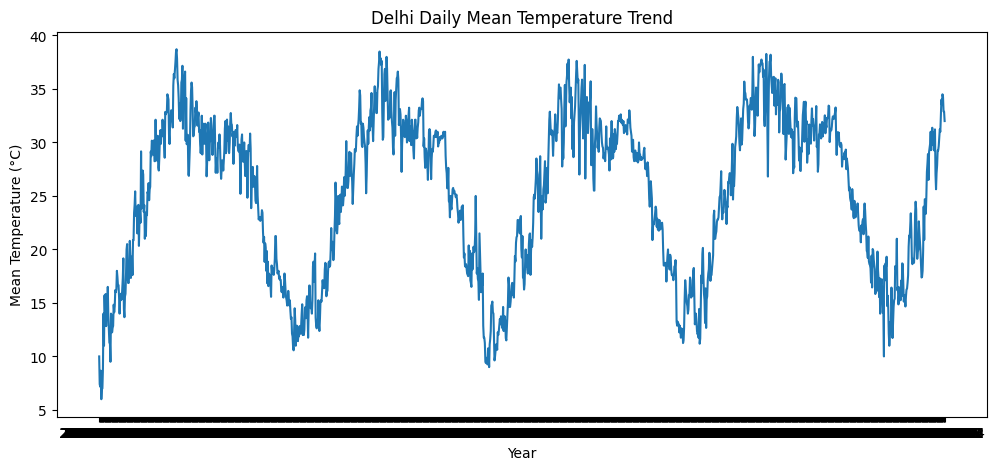

In [90]:
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["meantemp"])
plt.title("Delhi Daily Mean Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.show()

Monthly Average Temperature (Seasonal Pattern)

In [91]:
df['date'] = pd.to_datetime(df['date'])

In [92]:
df['Month'] = df['date'].dt.month

In [93]:
monthly_avg = df.groupby("Month")["meantemp"].mean()

In [94]:
month_names = [pd.Timestamp(1900, m, 1).strftime('%b') for m in monthly_avg.index]
monthly_avg.index = month_names

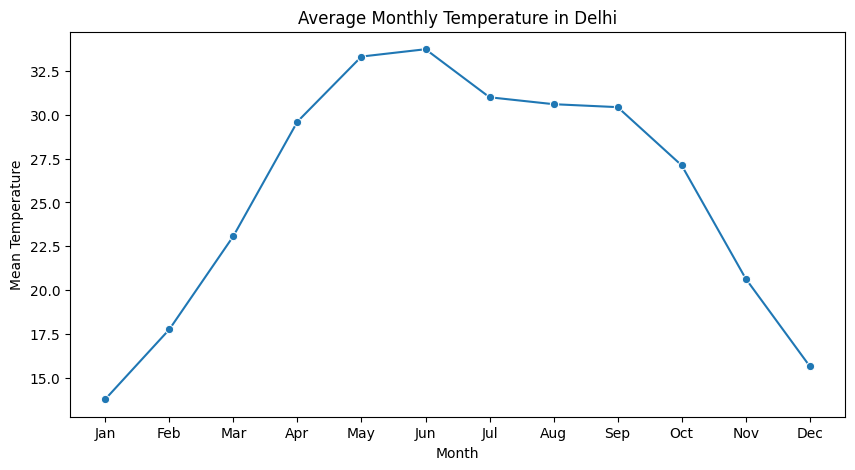

In [95]:
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker="o")
plt.title("Average Monthly Temperature in Delhi")
plt.xlabel("Month")
plt.ylabel("Mean Temperature")
plt.show()

Detect Heatwave Patterns (Temp > 40°C)

In [96]:
df["meantemp"].max()

np.float64(38.71428571428572)

1. Heatwave Detection Band Plot

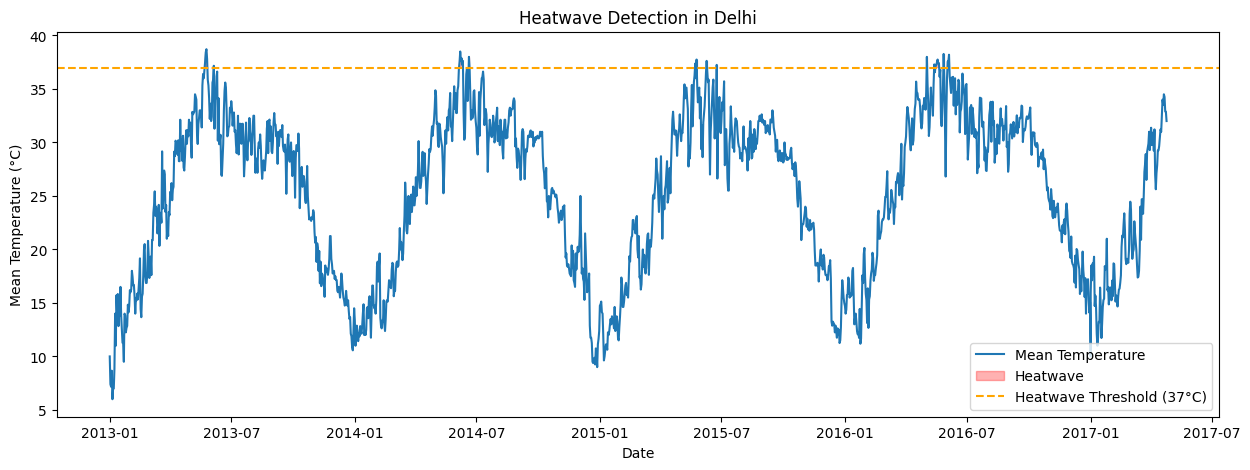

In [97]:
# Threshold for heatwave
threshold = 37

plt.figure(figsize=(15,5))
plt.plot(df["date"], df["meantemp"], label="Mean Temperature")

# Shade heatwave days
plt.fill_between(df["date"], df["meantemp"], threshold,
                 where=(df["meantemp"] > threshold),
                 color='red', alpha=0.3, label="Heatwave")

plt.axhline(threshold, color='orange', linestyle='--', label="Heatwave Threshold (37°C)")
plt.title("Heatwave Detection in Delhi")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.legend()
plt.show()

2. Heatwave Count Per Year

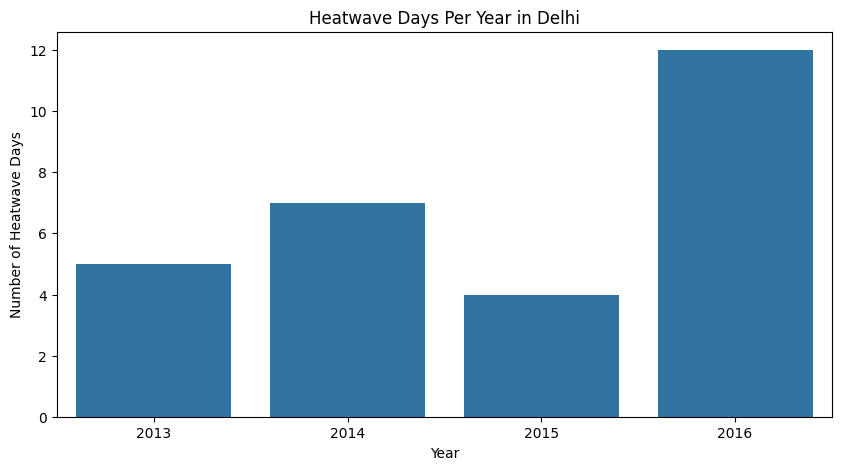

Year
2013     5
2014     7
2015     4
2016    12
Name: meantemp, dtype: int64

In [98]:
df["Year"] = df["date"].dt.year

heatwave_days = df[df["meantemp"] > threshold]
heatwave_count_year = heatwave_days.groupby("Year")["meantemp"].count()

plt.figure(figsize=(10,5))
sns.barplot(x=heatwave_count_year.index, y=heatwave_count_year.values)
plt.title("Heatwave Days Per Year in Delhi")
plt.xlabel("Year")
plt.ylabel("Number of Heatwave Days")
plt.show()

heatwave_count_year


3. Heatwave Duration Streaks (Consecutive Days)

In [99]:
# Boolean column: True = heatwave day
df["is_heatwave"] = df["meantemp"] > threshold

# Identify consecutive streaks
df["streak_id"] = (df["is_heatwave"] != df["is_heatwave"].shift()).cumsum()

# Filter streaks of heatwaves only
heatwave_streaks = df[df["is_heatwave"]].groupby("streak_id")["date"].count()

heatwave_streaks = heatwave_streaks.reset_index(name="duration_days")
heatwave_streaks


,streak_id,duration_days
0,2,4
1,4,1
2,6,6
3,8,1
4,10,1
5,12,1
6,14,1
7,16,1
8,18,1
9,20,1


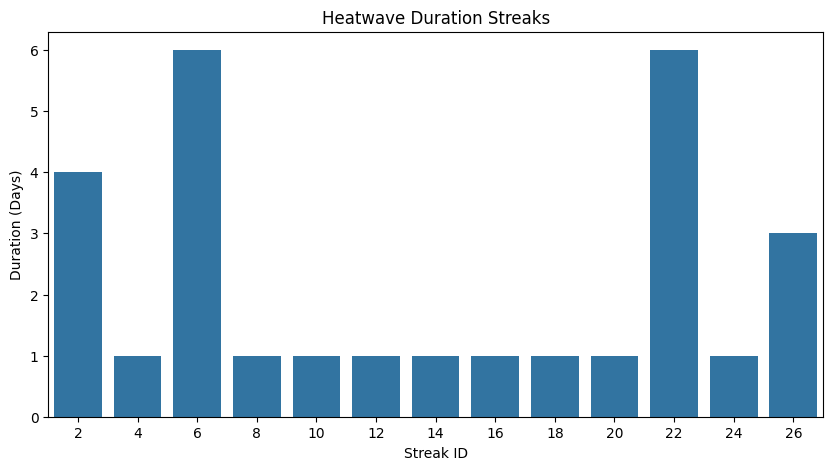

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(data=heatwave_streaks, x="streak_id", y="duration_days")
plt.title("Heatwave Duration Streaks")
plt.xlabel("Streak ID")
plt.ylabel("Duration (Days)")
plt.show()


4. Heatwave Intensity Index

C:\Users\Ashwin\AppData\Local\Temp\ipykernel_14480\2243818815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatwave_days["intensity"] = heatwave_days["meantemp"] - threshold


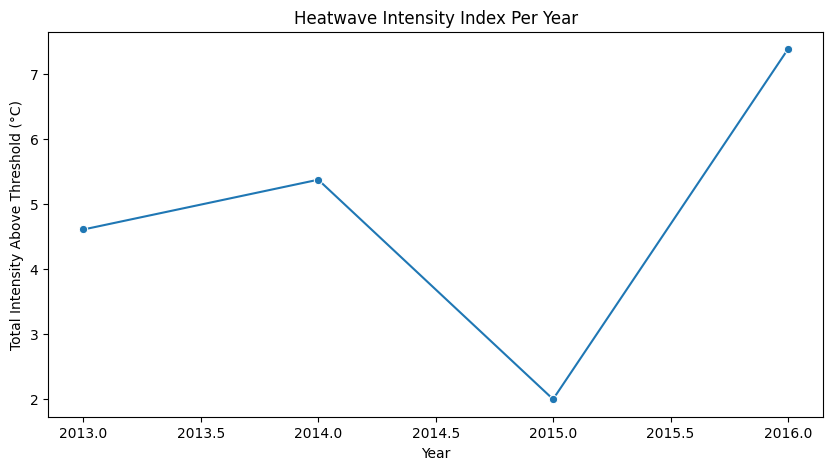

Year
2013    4.609524
2014    5.375000
2015    2.000000
2016    7.381131
Name: intensity, dtype: float64

In [101]:
heatwave_days["intensity"] = heatwave_days["meantemp"] - threshold

intensity_per_year = heatwave_days.groupby("Year")["intensity"].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=intensity_per_year.index, y=intensity_per_year.values, marker="o")
plt.title("Heatwave Intensity Index Per Year")
plt.xlabel("Year")
plt.ylabel("Total Intensity Above Threshold (°C)")
plt.show()

intensity_per_year


2. Humidity Correlations (Temp ↔ Humidity ↔ Pressure)

Correlation Heatmap

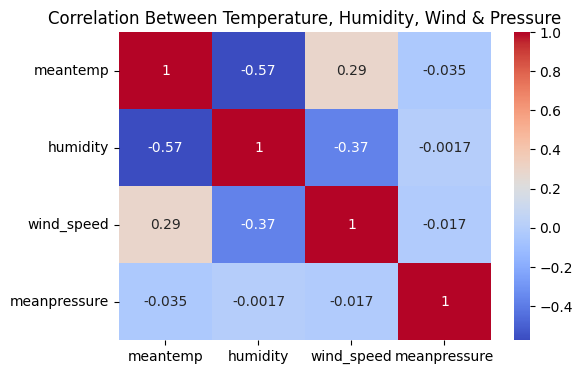

In [102]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["meantemp", "humidity", "wind_speed", "meanpressure"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Temperature, Humidity, Wind & Pressure")
plt.show()


Humidity vs Temperature

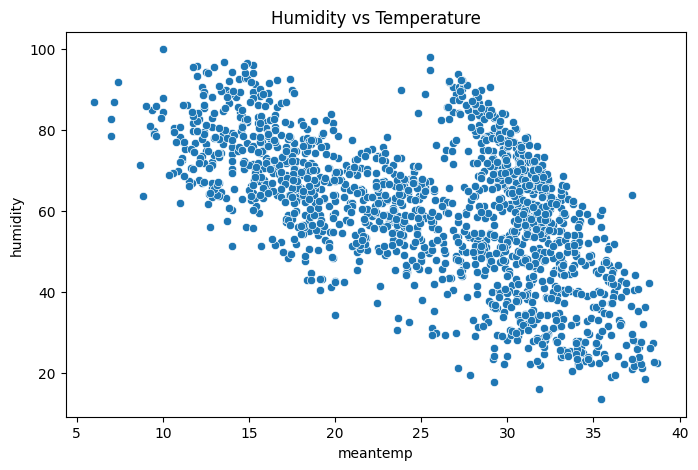

In [103]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="meantemp", y="humidity")
plt.title("Humidity vs Temperature")
plt.show()


Humidity vs Pressure

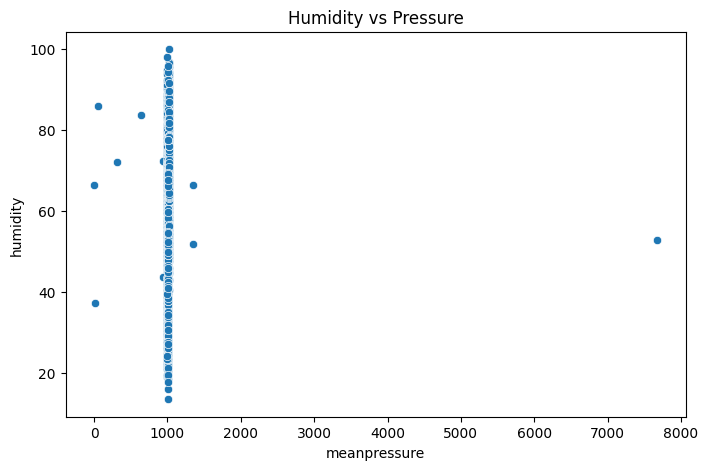

In [104]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="meanpressure", y="humidity")
plt.title("Humidity vs Pressure")
plt.show()


3.Pressure Stability — Identify Unusual Weather Events

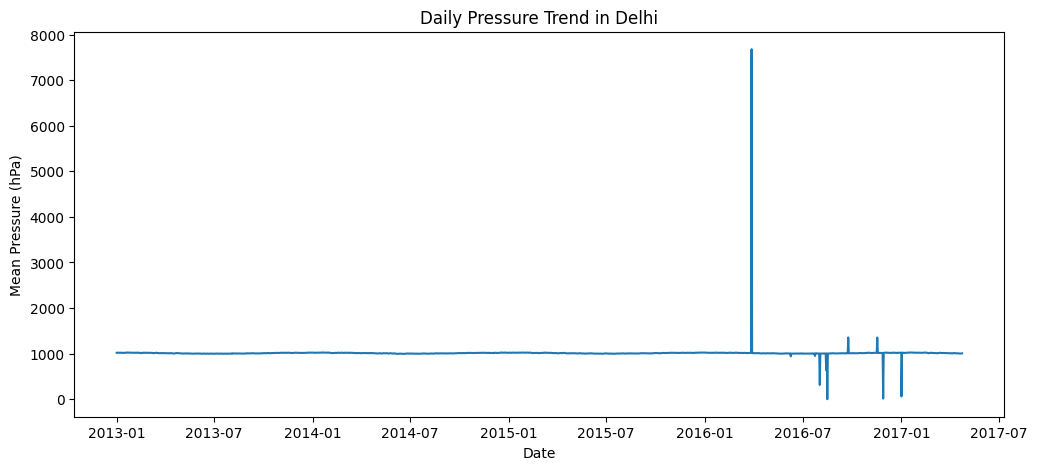

In [105]:
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["meanpressure"])
plt.title("Daily Pressure Trend in Delhi")
plt.xlabel("Date")
plt.ylabel("Mean Pressure (hPa)")
plt.show()


4. Wind Speed Variation — Calm vs Windy Days

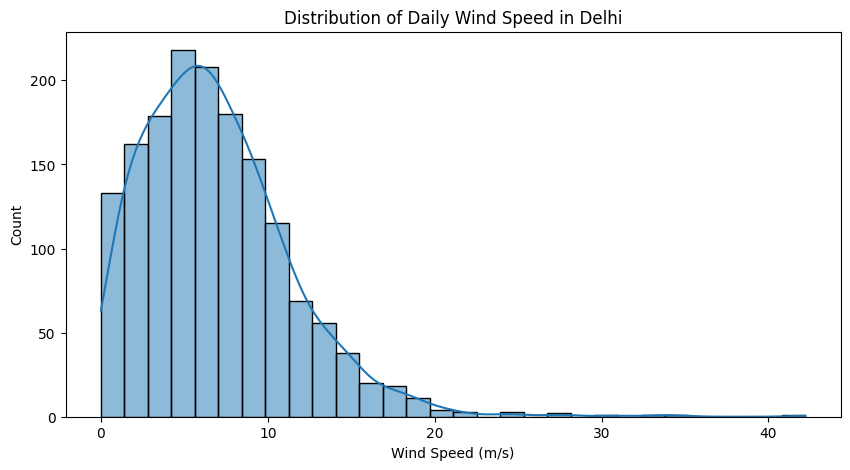

In [106]:
plt.figure(figsize=(10,5))
sns.histplot(df["wind_speed"], bins=30, kde=True)
plt.title("Distribution of Daily Wind Speed in Delhi")
plt.xlabel("Wind Speed (m/s)")
plt.show()


5. Seasonal (Winter vs Summer) Comparison

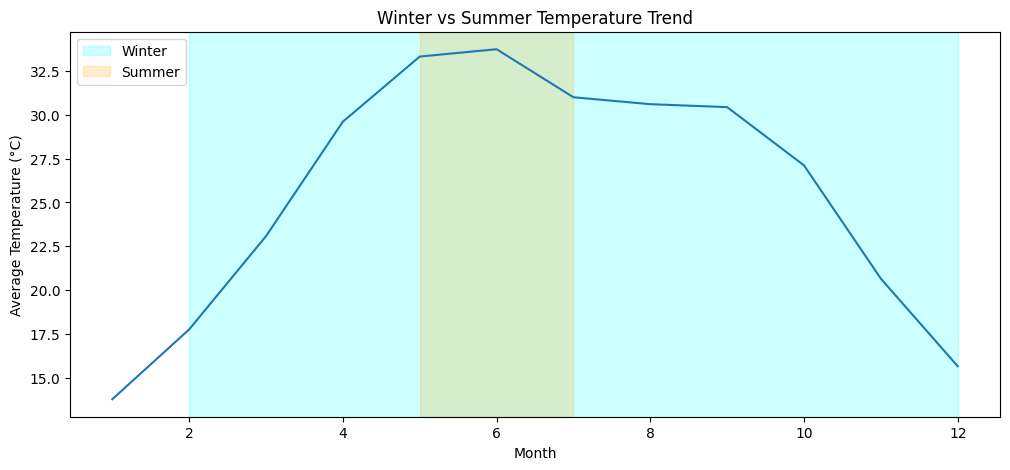

In [107]:
seasonal = df.groupby("Month")["meantemp"].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=seasonal.index, y=seasonal.values)
plt.axvspan(12, 2, alpha=0.2, color="cyan", label="Winter")
plt.axvspan(5, 7, alpha=0.2, color="orange", label="Summer")
plt.title("Winter vs Summer Temperature Trend")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.show()


6. Time Series Modeling (ARIMA / LSTM / Decomposition)

In [108]:
!pip install statsmodels


In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose

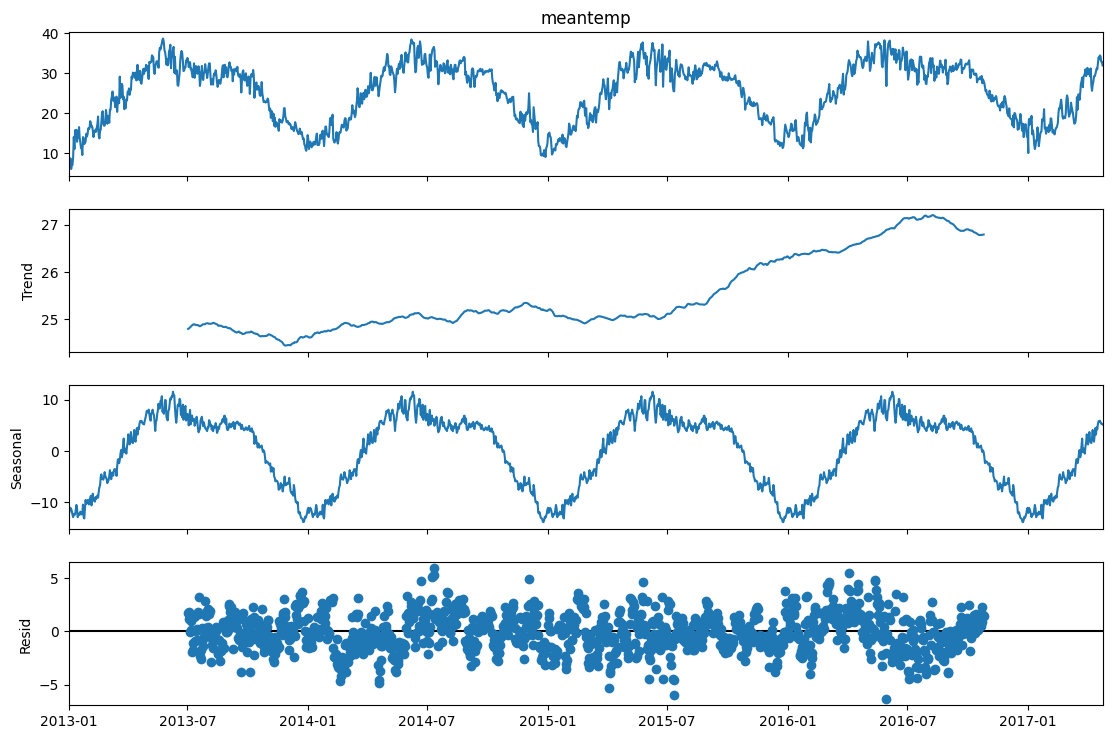

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_ts = df.set_index("date")

decomposition = seasonal_decompose(df_ts["meantemp"], model="additive", period=365)
fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.show()
